In [64]:
import scipy as sp
import scipy.io
import os
import numpy as np
import pandas as pd
import glob
import csv
import random as rand
from tqdm import tnrange, tqdm_notebook
from collections import Iterable
import matplotlib.pylab as plt
import random as rand
from ipywidgets import *
from scipy import stats
import importlib
import sys
sys.path.append(os.getcwd()+'/../crossmodal')
from utils import utils
# from utils import utils, zscores
# from utils import plotting_utils as pu
# from utils import auc_methods as am
# import matplotlib.patches as patches
# from matplotlib import gridspec
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import label_binarize
# from matplotlib_venn import venn2

%load_ext autoreload
%autoreload 2
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.close('all')

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 6}

mpl.rc('font', **font)
mpl.rc('xtick', labelsize=6) 
mpl.rc('ytick', labelsize=6)
mpl.rc('axes', labelsize=6)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
size_mult = 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_directory = r'C:\Users\efink\Documents\DATA\Crossmodal_only'

In [ ]:
log_df = pd.read_hdf(f'{data_directory}/log_df_processed_02-28-2019.h5', 'fixed')
unit_key_df = pd.read_hdf(f'{data_directory}/unit_key_df_processed_02-28-2019.h5', 'fixed')
unit_key_df = unit_key_df[~(unit_key_df['mouse_name'].isin(['EF0083','EF0085', 'EF0112', 'EF0111']))]

In [ ]:
beh_df = log_df[['mouse_name', 'date', 'trial_num', 'block_type', 
                 'trial_type', 'response', 'correct', 'stim_onset','first_lick']].drop_duplicates(subset = ['mouse_name', 'date', 'trial_num','trial_type'])

In [ ]:
beh_df = beh_df.sort_values(by = ['mouse_name', 'date', 'trial_num']).reset_index(drop=True)

In [ ]:
##########################################

In [4]:
# unit_key_df = pd.read_hdf(r'C:\Users\efink\Documents\Github\crossmodal\Figure2\z_scored_df.h5', 'table')
log_df = pd.read_hdf(r'C:\Users\efink\Documents\Github\crossmodal\Figure1\log_df_02-19-19.h5', 'table')
switch_log_df = pd.read_hdf(r'C:\Users\efink\Documents\Github\crossmodal\Figure2\switching_log.h5', 'table')

# excluded EF0088 since trained on switching task after initial CM training
switch_log_df = switch_log_df.loc[~(switch_log_df['mouse_name'] == 'EF0088'),:]

In [15]:
os.chdir(r'C:/users/efink/documents/github/crossmodal/figure1')
!pwd

/c/users/efink/documents/github/crossmodal/figure1


In [16]:
beh_data_files = glob.glob("behavior*")
beh_data_files

['behavior_log.mat',
 'behavior_log_01-31-19.mat',
 'behavior_log_02-19-19.mat',
 'behavior_log_02-19-19b.mat']

In [25]:
beh_data_files = glob.glob("behavior*")
behavior_df = pd.DataFrame([])
mat = sp.io.loadmat(beh_data_files[-1])
beh_df = pd.DataFrame(mat['behavior_log'])

In [26]:
for col in range(beh_df.shape[1]): 
    beh_df.iloc[:,col] = beh_df.iloc[:,col].str[0]
    
col_names = beh_df.loc[0,:]
beh_df = beh_df.iloc[1:,:].rename(columns = col_names)

for col in [5,8]:
    beh_df.iloc[:,col] = beh_df.iloc[:,col].str[0]

beh_df.head()

,mouse_name,session_type,session_date,block_type,trial_type,trial_num,som_stim_type,vis_stim_type,response
1,EF0072,Solo.EFcross2Array,12-02-15,Visual,NoStim_Som_NoCue,1,SineAmp1Freq40Cyc40,Amp0p05Dur0p075,0
2,EF0072,Solo.EFcross2Array,12-02-15,Whisker,Stim_Som_NoCue,2,SineAmp1Freq40Cyc40,Amp0p05Dur0p075,0
3,EF0072,Solo.EFcross2Array,12-02-15,Whisker,NoStim_Som_NoCue,3,SineAmp1Freq40Cyc40,Amp0p05Dur0p075,1
4,EF0072,Solo.EFcross2Array,12-02-15,Whisker,Stim_Som_NoCue,4,SineAmp1Freq40Cyc40,Amp0p05Dur0p075,0
5,EF0072,Solo.EFcross2Array,12-02-15,Whisker,NoStim_Som_NoCue,5,SineAmp1Freq40Cyc40,Amp0p05Dur0p075,1


In [27]:
beh_df['mouse_name'].unique()

array(['EF0072', 'EF0074', 'EF0076', 'EF0077', 'EF0079', 'Ef0079',
       'EF0081', 'EF0083', 'EF0084', 'EF0085', 'EF0088', 'EF0089',
       'EF0091', 'EF0094', 'EF0098', 'EF0099', 'EF0100', 'EF0101',
       'EF00101', 'EF0102', 'EF0111', 'EF0112', 'EF0114', 'EF0131',
       'EF0132', 'EF0134', 'EF0144', 'EF0147', 'EF0149', 'EF0148',
       'EF0151', 'EF0150'], dtype=object)

#### clean up dataframe - remove unsuccessful mice, rename misnamed mice

In [28]:
beh_df = beh_df.loc[beh_df['mouse_name'] != 'EF0072', :]
beh_df = beh_df.loc[beh_df['mouse_name'] != 'EF0100', :]
beh_df.loc[beh_df['mouse_name'] == 'EF00101', 'mouse_name'] = 'EF0101'
beh_df.loc[beh_df['mouse_name'] == 'Ef0079', 'mouse_name'] = 'EF0079'

In [29]:
beh_df = beh_df[~((beh_df['mouse_name'] == 'EF0074') & beh_df['trial_type'].str.contains('NoStim'))]
log_df = log_df[~((log_df['mouse_name'] == 'EF0074') & log_df['trial_type'].str.contains('NoStim'))]

#### remove switch-task mice, reverse contingency mice, and S1 inhibition/stimulation mice from the behavioral analyses

In [30]:
beh_df = beh_df.loc[~beh_df['mouse_name'].isin(['EF0102','EF0101','EF0099','EF0091','EF0094', 
                                              'EF0098','EF0131', 'EF0132', 'EF0144', 'EF0147',
                                              'EF0148', 'EF0149','EF0150','EF0111', 'EF0112',
                                              'EF0151', # not yet included in any experiments
                                              'EF0134']), # not included in any experiments
                                               :]

log_df = log_df.loc[~log_df['mouse_name'].isin(['EF0102','EF0101','EF0099','EF0091','EF0094', 
                                              'EF0098','EF0131', 'EF0132', 'EF0144', 'EF0147',
                                              'EF0148', 'EF0149','EF0150','EF0111', 'EF0112',
                                              'EF0151', # not yet included in any experiments
                                              'EF0134']), # not included in any experiments
                                               :]

#### remove premature lick trials

In [31]:
beh_df = beh_df.loc[beh_df['response'].isin([0,1,2]).as_matrix(), :]
beh_df = beh_df.sort_values(by = ['mouse_name', 'session_date', 'trial_num'])

C:\Users\efink\Anaconda3\envs\crossmodal\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


#### Convert session_date column to datetime data type and remove days after full crossmodal recording finished

In [32]:
from datetime import datetime
beh_df['session_date'] = beh_df['session_date'].apply(lambda x:  datetime.strptime(x, '%m-%d-%y'))
beh_df = beh_df.sort_values(by = 'session_date').reset_index(drop = True)

## only needed for mice that were later repurposed for other experiments
last_recording_days = {'EF0114':'06-01-18'} 
for mouse, last_day in last_recording_days.items():
    beh_df = beh_df.loc[~((beh_df['mouse_name'] == mouse) & (beh_df['session_date'] > datetime.strptime(last_day, '%m-%d-%y')))]

#### define which days are the first full crossmodal training day for each mouse

In [33]:
first_CM_days = pd.DataFrame({'EF0074':'12-10-15', 'EF0076': '12-23-15', 'EF0077': '02-11-16', 'EF0079' : '02-12-16',  
                              'EF0081': '04-12-16','EF0083': '05-10-16', 'EF0084': '06-13-16', 'EF0085': '06-13-16',
                              'EF0088':'06-28-16',  'EF0089':'07-08-16','EF0091': '12-01-16', 'EF0094': '01-24-17',
                              'EF0098': '02-07-17' , 'EF0099': '02-08-17', 'EF0101' : '06-20-17', 'EF0102' : '06-20-17',
                             'EF0111':'02-20-18', 'EF0112':'02-20-18', 'EF0114':'03-12-18', 'EF0131': '06-14-18', 'EF0132':'06-21-18',
                             'EF0144':'08-01-18', 'EF0147':'10-22-18', 'EF0148':'10-22-18', 'EF0149':'10-23-18', 'EF0150':'11-02-18'}, 
                             index = ['first_train_date']).T

first_CM_days['first_train_date'] = first_CM_days['first_train_date'].apply(lambda x:  datetime.strptime(x, '%m-%d-%y'))

#### load main data table that includes ephys data. This will define which days are the test days/recorded sessions for each mouse

#### identify the first recording day for each by looking at log_df dataframes that contain only data from recording days and find the first day for each mouse

In [34]:
recording_days_sw = switch_log_df.loc[:, ['mouse_name', 'date']].drop_duplicates()
recording_days = pd.concat((log_df.loc[:, ['mouse_name', 'date']].drop_duplicates(), recording_days_sw), axis = 0)

recording_days['date_str'] = recording_days['date']
recording_days.loc[recording_days['date'].str.contains('b'), 'date'] = recording_days.loc[recording_days['date'].str.contains('b'), 'date'].apply(lambda x: x[:-1])

recording_days['date'] = recording_days['date'].apply(lambda x:  datetime.strptime(x, '%m-%d-%y'))
first_recording = {}
for mouse in recording_days['mouse_name'].unique():
    first = recording_days.loc[recording_days['mouse_name'] == mouse, 'date'].min()
    first_recording[mouse] = first
first_recording = pd.DataFrame(first_recording, index = ['first_rec_date']).T


#### define trials which are fullstim vs short stim

In [35]:
beh_df['full_stim'] = 0
beh_df.loc[~beh_df['trial_type'].str.contains('1Cyc'), 'full_stim'] = 1

#### define trials as hit/miss/cr/fa and whether they were correct or not

In [37]:
beh_df

,mouse_name,session_type,session_date,block_type,trial_type,trial_num,som_stim_type,vis_stim_type,response,full_stim,Hits,FAs,Misses,CRs,correct
0,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,2,SineAmp1Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
1,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,210,SineAmp0p85Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
2,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,208,SineAmp0p85Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
3,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,207,SineAmp0p85Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
4,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,206,SineAmp0p85Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273863,EF0114,Solo.EFcross3Array,2018-06-01,Visual,Stim_Vis_NoCue,122,SineAmp0p750Freq20Cyc3,Amp0p5Dur0p150,2,1,True,False,False,False,True
273864,EF0114,Solo.EFcross3Array,2018-06-01,Visual,Stim_Vis_NoCue,121,SineAmp0p750Freq20Cyc3,Amp0p5Dur0p150,0,1,False,False,True,False,False
273865,EF0114,Solo.EFcross3Array,2018-06-01,Visual,Stim_Som_NoCue,120,SineAmp0p750Freq20Cyc3,Amp0p5Dur0p150,0,1,False,False,False,True,True
273866,EF0114,Solo.EFcross3Array,2018-06-01,Visual,Stim_Som_NoCue,119,SineAmp0p750Freq20Cyc3,Amp0p5Dur0p150,2,1,False,True,False,False,False


In [ ]:
#################################################

In [38]:
w_block = beh_df['block_type'] == 'Whisker'
v_block = ~w_block

tac_trial = beh_df['trial_type'].str.contains('Som')
vis_trial = ~tac_trial

hits = (w_block & tac_trial & (beh_df['response'] == 1)) | (v_block & vis_trial & (beh_df['response'] == 2))
misses = (w_block & tac_trial & (beh_df['response'] == 0)) | (v_block & vis_trial & (beh_df['response'] == 0))
correct_rej = (v_block & tac_trial & (beh_df['response'] == 0)) | (w_block & vis_trial & (beh_df['response'] == 0))
false_alarms = ((w_block & tac_trial & (beh_df['response'] == 2)) | (v_block & vis_trial & (beh_df['response'] == 1)) | 
                (v_block & tac_trial & (beh_df['response'] != 0)) | (w_block & vis_trial & (beh_df['response'] != 0)))

In [39]:
beh_df

,mouse_name,session_type,session_date,block_type,trial_type,trial_num,som_stim_type,vis_stim_type,response,full_stim,Hits,FAs,Misses,CRs,correct
0,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,2,SineAmp1Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
1,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,210,SineAmp0p85Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
2,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,208,SineAmp0p85Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
3,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,207,SineAmp0p85Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
4,EF0074,Solo.EFcross2Array,2015-12-03,Whisker,Stim_Som_NoCue,206,SineAmp0p85Freq40Cyc3,Amp0p05Dur0p075,1,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273863,EF0114,Solo.EFcross3Array,2018-06-01,Visual,Stim_Vis_NoCue,122,SineAmp0p750Freq20Cyc3,Amp0p5Dur0p150,2,1,True,False,False,False,True
273864,EF0114,Solo.EFcross3Array,2018-06-01,Visual,Stim_Vis_NoCue,121,SineAmp0p750Freq20Cyc3,Amp0p5Dur0p150,0,1,False,False,True,False,False
273865,EF0114,Solo.EFcross3Array,2018-06-01,Visual,Stim_Som_NoCue,120,SineAmp0p750Freq20Cyc3,Amp0p5Dur0p150,0,1,False,False,False,True,True
273866,EF0114,Solo.EFcross3Array,2018-06-01,Visual,Stim_Som_NoCue,119,SineAmp0p750Freq20Cyc3,Amp0p5Dur0p150,2,1,False,True,False,False,False


In [56]:
beh_df['trial_outcome'] = np.nan
beh_df.loc[hits.values, 'trial_outcome'] = 'hit'
beh_df.loc[misses, 'trial_outcome'] = 'miss'
beh_df.loc[correct_rej, 'trial_outcome'] = 'CR'
beh_df.loc[false_alarms, 'trial_outcome'] = 'FA'
beh_df = beh_df.loc[~(beh_df['response'] == 3), :]
beh_df = beh_df.sort_values(['mouse_name', 'session_date', 'trial_num']).reset_index(drop=True)

In [42]:
def calc_hit_cr_rate(df):
    df['hit_rate'] = np.nan
    df['CR_rate'] = np.nan
    
    ##### hits
    pos_trials = (((df['block_type'] == 'Whisker') & df['trial_type'].str.contains('Som')) |
                  ((df['block_type'] == 'Visual') & df['trial_type'].str.contains('Vis')))*1.0
    pos_only = pos_trials[pos_trials == 1]
    hits = (df['trial_outcome'] == 'hit')*1.0
    hits_pos_only = hits[pos_trials == 1]
    hit_rate = pos_only - 1 + hits_pos_only
    
    ###### CRs
    neg_trials = (((df['block_type'] == 'Whisker') & df['trial_type'].str.contains('Vis')) |
                  ((df['block_type'] == 'Visual') & df['trial_type'].str.contains('Som')))*1.0
    neg_only = neg_trials[neg_trials == 1]
    CR_trials = df['trial_outcome'] == 'CR'
    CR_neg_only = CR_trials[neg_trials == 1]
    CR_rate = neg_only - 1 + CR_neg_only

    ####### running averages
    moving_hit_rate = hit_rate.rolling(window = 1000, min_periods = 1).mean()
    moving_CR_rate = CR_rate.rolling(window = 1000, min_periods = 1).mean()

    df.loc[moving_hit_rate.index, 'hit_rate'] = moving_hit_rate
    df.loc[moving_CR_rate.index, 'CR_rate'] = moving_CR_rate

    df.loc[:, ['hit_rate', 'CR_rate']] = df.loc[:, ['hit_rate', 'CR_rate']].fillna(method = 'ffill').fillna(0.)
    
    return df

In [43]:
def calc_hit_cr_rate(df):
    df['tac_lick'] = np.nan
    df['tac_nolick'] = np.nan
    
    ##### hits
    pos_trials = (((df['block_type'] == 'Whisker') & df['trial_type'].str.contains('Som')) |
                  ((df['block_type'] == 'Visual') & df['trial_type'].str.contains('Vis')))*1.0
    pos_only = pos_trials[pos_trials == 1]
    hits = (df['trial_outcome'] == 'hit')*1.0
    hits_pos_only = hits[pos_trials == 1]
    hit_rate = pos_only - 1 + hits_pos_only
    
    ###### CRs
    neg_trials = (((df['block_type'] == 'Whisker') & df['trial_type'].str.contains('Vis')) |
                  ((df['block_type'] == 'Visual') & df['trial_type'].str.contains('Som')))*1.0
    neg_only = neg_trials[neg_trials == 1]
    CR_trials = df['trial_outcome'] == 'CR'
    CR_neg_only = CR_trials[neg_trials == 1]
    CR_rate = neg_only - 1 + CR_neg_only

    ####### running averages
    moving_hit_rate = hit_rate.rolling(window = 1000, min_periods = 1).mean()
    moving_CR_rate = CR_rate.rolling(window = 1000, min_periods = 1).mean()

    df.loc[moving_hit_rate.index, 'hit_rate'] = moving_hit_rate
    df.loc[moving_CR_rate.index, 'CR_rate'] = moving_CR_rate

    df.loc[:, ['hit_rate', 'CR_rate']] = df.loc[:, ['hit_rate', 'CR_rate']].fillna(method = 'ffill').fillna(0.)
    
    return df

In [57]:
beh_grouped = beh_df.groupby(['mouse_name', 'session_date'])
beh_df_test = pd.concat([calc_hit_cr_rate(y.copy()) for x, y in beh_grouped])
beh_grouped = beh_df_test.groupby(['mouse_name', 'session_date'])
session_gen = iter(beh_grouped)

In [59]:
# gr, df = next(session_gen)

In [86]:
def group_lick_nolick(df):
    tac_lick_ind = (df['trial_type'].str.contains('Som') & df['trial_outcome'].isin(['hit', 'FA']))
    tac_lick = df.loc[tac_lick_ind, 'trial_num'] - df.iloc[0]['trial_num']+1

    tac_nolick_ind = (df['trial_type'].str.contains('Som') & df['trial_outcome'].isin(['miss', 'CR']))
    tac_nolick = df.loc[tac_nolick_ind, 'trial_num'] - df.iloc[0]['trial_num']+1

    vis_lick_ind = (df['trial_type'].str.contains('Vis') & df['trial_outcome'].isin(['hit', 'FA']))
    vis_lick = df.loc[vis_lick_ind, 'trial_num'] - df.iloc[0]['trial_num']+1

    vis_nolick_ind = (df['trial_type'].str.contains('Vis') & df['trial_outcome'].isin(['miss', 'CR']))
    vis_nolick = df.loc[vis_nolick_ind, 'trial_num'] - df.iloc[0]['trial_num']+1

    block_transitions = (df['block_type'].str.contains('Whisker')*1).diff()
    block_transitions = df.loc[block_transitions != 0, 'trial_num'] - df.iloc[0]['trial_num']+1
    
    return [tac_lick, tac_nolick, vis_lick, vis_nolick, block_transitions]

In [208]:
# fig, (ax, ax1) = plt.subplots(2,1, figsize = (2,1.167), gridspec_kw = {'height_ratios': [1,.75]}, sharex = True)

def plot_session_perf(df):
    
    [tac_lick, tac_nolick, vis_lick, vis_nolick, block_transitions] = group_lick_nolick(df)
    num_trials = df.shape[0]
#     fig, (ax, ax1) = plt.subplots(2,1, figsize = (9.6,2.4), gridspec_kw = {'height_ratios': [1,.65]}, sharex = True)
    fig, (ax, ax1) = plt.subplots(2,1, figsize = (3.2,.8), gridspec_kw = {'height_ratios': [1,.75]}, sharex = True)

    x_vals = df['trial_num']-df['trial_num'].iloc[0]
    ax1.plot(x_vals, df['hit_rate'], 'b')
    ax1.plot(x_vals, df['CR_rate'], 'r')

    ax1.set_xlim(0,400)
    ax1.set_ylim(0,1)
    for a in [ax,ax1]:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.tick_params(axis='y', length=1)

    ax1.text(0.5, 0.3, 'Hit rate', transform = ax1.transAxes, color = 'b')
    ax1.text(0.5, 0.1, 'Correct rejection rate', transform = ax1.transAxes, color = 'r')

    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_visible(False)

    y_vals = [6.5,5, 3,1.5]
    height = 0.4
    ax.vlines(tac_lick, y_vals[0]-height, y_vals[0]+height, color = '#7F3F97', alpha = 0.75)
    ax.vlines(tac_nolick, y_vals[1]-height, y_vals[1]+height, color = [0.6,0.6,0.6], alpha = 0.75)
    ax.vlines(vis_lick, y_vals[2]-height, y_vals[2]+height, color = 'C1', alpha = 0.75)
    ax.vlines(vis_nolick, y_vals[3]-height, y_vals[3]+height, color = [0.6,0.6,0.6], alpha = 0.75)
    ax.set_yticks(y_vals)
    ax.set_yticklabels(['Touch-lick', 'Touch-no lick','Visual-lick', 'Visual-no lick'])


    for bt in block_transitions.values[1:]:
        ax.axvline(bt+0.5, linestyle = ':', color = 'k')

    ax1.plot([0,df['trial_num'].iloc[-1]],[0.5, 0.5], linestyle = ':', color = 'k')
    ax.set_ylim([y_vals[-1]-1, y_vals[0]+1])
    ax1.spines['bottom'].set_bounds(50, 100)
    ax1.set_xticks([75])
    ax1.set_xticklabels(['50 trials'])
    ax1.tick_params(axis='x', length=0)
    ax1.set_yticks([0.,0.5,1.0])
    fig.subplots_adjust(left = 0.3, right = 0.9, hspace = .1)
    return fig


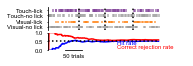

In [209]:
df = beh_grouped.get_group(('EF0076', '01-03-16'))
fig = plot_session_perf(df)
fig.savefig('ex1.pdf', format='pdf', dpi=900, transparent = True)

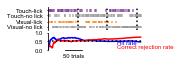

In [210]:
df = beh_grouped.get_group(('EF0076', '01-29-16'))
df = df.loc[(df['trial_num']>2)&(df['trial_num'] < 314), :]
fig = plot_session_perf(df)
fig.savefig('ex2.pdf', format='pdf', dpi=900, transparent = True)

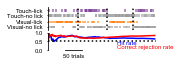

In [211]:
df = beh_grouped.get_group(('EF0076', '02-15-16'))
df = df.loc[(df['trial_num']>2)&(df['trial_num'] < 314), :]
fig = plot_session_perf(df)
fig.savefig('ex3.pdf', format='pdf', dpi=900, transparent = True)